# Задания Pandas и Matplotlib

**Импорт библиотек**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

**Задание №1**

Используя данные *mtcars*, рассчитайте средний расход топлива (mpg) для автомобилей c числом лошадиных сил (hp), большим 120 и у которых вес менее 4000 фунтов.

Получившийся результат (среднее значение) сохраните в переменную result.

In [20]:
# Загрузка набора данных'
mtcars = pd.read_csv("info-folder/data/mtcars.csv")

# Отображение первых нескольких строк и столбцов, чтобы понять структуру данных
mtcars.head(), mtcars.columns

(               model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
 0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
 1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
 2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
 3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
 4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
 
    carb  
 0     4  
 1     4  
 2     1  
 3     1  
 4     2  ,
 Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
        'gear', 'carb'],
       dtype='object'))

In [21]:
# Фильтруем данные по условиям: мощность > 120 лошадиных сил и вес < 4000 фунтов
filtered_cars = mtcars[(mtcars['hp'] > 120) & (mtcars['wt'] < 4.0)]

# Рассчитываем среднее количество миль на галлон для отфильтрованного набора данных
result = filtered_cars['mpg'].mean()
result

np.float64(16.63076923076923)

**Задание №2**

Рассчитайте стандартное отклонение переменной mpg (расход топлива), переменной disp (вместимости двигателя) у машин с автоматической и ручной коробкой передач.

Полученные результаты сохраните в переменную descriptions_stat.

In [22]:
# Расчет стандартного отклонения «mpg» и «disp» для автоматического (am=0) и ручного (am=1) типов трансмиссии
descriptions_stat = mtcars.groupby('am')[['mpg', 'disp']].std()
descriptions_stat

,mpg,disp
am,,
0,3.833966,110.171647
1,6.166504,87.203989


**Задание №3**

Воспользуйтесь данными airquality. В новую переменную сохраните подмножество исходных данных, оставив наблюдения только для месяцев 5, 6 и 7.

Рассчитайте количество непропущенных наблюдений по переменной Solar.R (солнечная радиация) в 5, 6 и 7 месяце.

Результат выполнения сохраните в переменную result1.

In [23]:
# Загрузка набора данных
airquality = pd.read_csv("info-folder/data/airquality.csv")

# Отображение первых нескольких строк и столбцов, чтобы понять структуру данных
airquality.head(), airquality.columns

(   rownames  Ozone  Solar.R  Wind  Temp  Month  Day
 0         1   41.0    190.0   7.4    67      5    1
 1         2   36.0    118.0   8.0    72      5    2
 2         3   12.0    149.0  12.6    74      5    3
 3         4   18.0    313.0  11.5    62      5    4
 4         5    NaN      NaN  14.3    56      5    5,
 Index(['rownames', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object'))

In [24]:
# Фильтрация, чтобы включить только наблюдения за 5, 6 и 7 месяцы.
subset_airquality = airquality[airquality['Month'].isin([5, 6, 7])]

# Непропущенные наблюдения в Solar.R за отфильтрованные месяцы.
result1 = subset_airquality['Solar.R'].notna().sum()
result1

np.int64(88)

**Задание №4**

Примените функцию describe к количественным переменным данных airquality, группируя наблюдения по переменной Month.

Чему равен коэффициент асимметрии(skew) переменной Wind в седьмом месяце?

In [25]:
# Группировка по месяцам и применение описания к числовым столбцам.
grouped_description = airquality.groupby('Month').describe()

# Асимметрия переменной «Ветер» в седьмом месяце (Месяц == 7).
wind_july = airquality[airquality['Month'] == 7]['Wind']
wind_skew_july = skew(wind_july, nan_policy='omit')
wind_skew_july

np.float64(0.48234895480248485)

**Задание №5**

Создайте случайный вектор my_vector (выборка из нормального распределения) с пропущенными значениями, состоящий из 30 элементов.

Вам нужно создать новый вектор fixed_vector, в котором все пропущенные значения вектора my_vector будут заменены на среднее значение по имеющимся наблюдениям.

При этом исходный вектор оставьте без изменений!

In [26]:
# Сгенерируйте случайный вектор из нормального распределения с 30 элементами
np.random.seed(0)  # Заложена основа для воспроизводимости
my_vector = np.random.normal(loc=0, scale=1, size=30)

# Вводите недостающие значения случайным образом
missing_indices = np.random.choice(30, size=5, replace=False)  # Случайным образом выберите 5 индексов в качестве NaN
my_vector[missing_indices] = np.nan

# Вычислите среднее значение не пропущенных значений
mean_value = np.nanmean(my_vector)

# Создайте фиксированный_вектор, заменив NaN в моем_векторе средним значением не пропущенных значений
fixed_vector = np.where(np.isnan(my_vector), mean_value, my_vector)

my_vector, fixed_vector

(array([ 1.76405235,  0.40015721,         nan,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,         nan,  0.44386323,
         0.33367433,         nan, -0.20515826,  0.3130677 , -0.85409574,
        -2.55298982,  0.6536186 ,  0.8644362 ,         nan,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,         nan]),
 array([ 1.76405235,  0.40015721,  0.3985603 ,  2.2408932 ,  1.86755799,
        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
         0.14404357,  1.45427351,  0.76103773,  0.3985603 ,  0.44386323,
         0.33367433,  0.3985603 , -0.20515826,  0.3130677 , -0.85409574,
        -2.55298982,  0.6536186 ,  0.8644362 ,  0.3985603 ,  2.26975462,
        -1.45436567,  0.04575852, -0.18718385,  1.53277921,  0.3985603 ]))

**Задание №6**

Постройте график boxplot, используя данные airquality. По оси x отложите номер месяца, по оси y — значения переменной Temp.

На графике boxplot отдельными точками отображаются наблюдения, отклоняющиеся от 1 или 3 квартиля больше чем на полтора межквартильных размаха.

Сколько таких наблюдений присутствует в июле (месяц №7)?

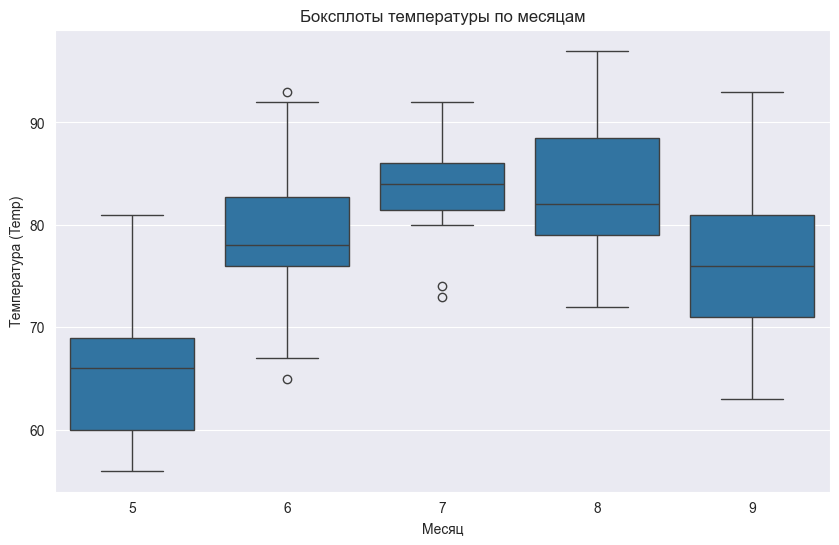

2

In [27]:
# Данные фильтрации за июль
july_data = airquality[airquality['Month'] == 7]

# Постройте боксплот для значений температуры по месяцам
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temp', data=airquality)

# Рассчитайте IQR для Temp в июле, чтобы определить отклонения вручную
q1 = july_data['Temp'].quantile(0.25)
q3 = july_data['Temp'].quantile(0.75)
iqr = q3 - q1

# Определите границы для выбросов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Подсчет июльских выбросов в Temp на основе правила IQR
outliers_july = july_data[(july_data['Temp'] < lower_bound) | (july_data['Temp'] > upper_bound)]
outliers_count = outliers_july.shape[0]

# Показать сюжет
plt.title("Боксплоты температуры по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Температура (Temp)")
plt.show()

outliers_count

**Задание №7**

Используя данные mtcars, нужно построить Scatterplot (диаграмма рассеивания), по оси x которого будет hp, по оси y – qsec, а цветом отобразить переменну (mpg).

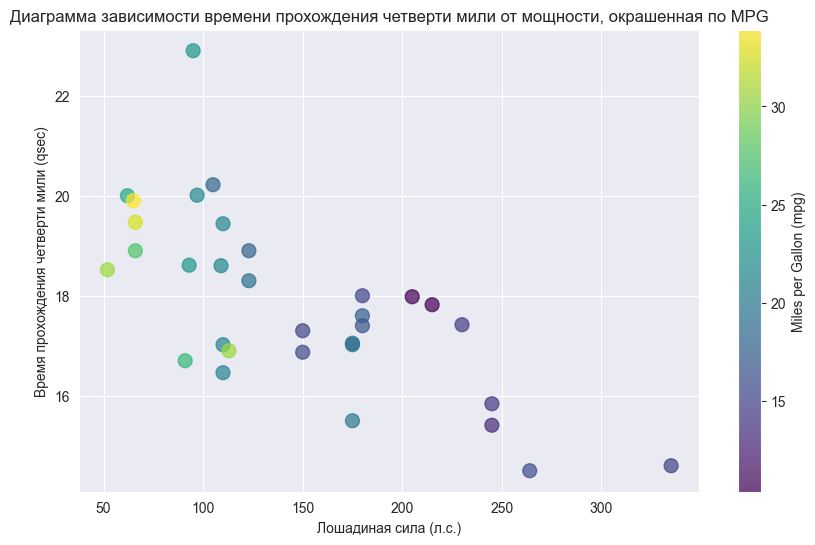

In [28]:
# Постройте диаграмму рассеяния
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=mtcars['hp'], y=mtcars['qsec'], c=mtcars['mpg'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Miles per Gallon (mpg)')

# Пометьте участок
plt.xlabel("Лошадиная сила (л.с.)")
plt.ylabel("Время прохождения четверти мили (qsec)")
plt.title("Диаграмма зависимости времени прохождения четверти мили от мощности, окрашенная по MPG")

# Отображение графика
plt.show()

**Задание №8**

Основываясь на данных iris постройте график Scatterplot (диаграмма рассеивания), где по оси X будет отложена переменная Sepal.Length, по оси Y переменная Sepal.Width. За цвет точек будет отвечать переменная Species, а за размер точек переменная Petal.Length.

In [29]:
iris = pd.read_csv("info-folder/data/Iris.csv")

iris.head(), iris.columns

(   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
 0   1            5.1           3.5            1.4           0.2  Iris-setosa
 1   2            4.9           3.0            1.4           0.2  Iris-setosa
 2   3            4.7           3.2            1.3           0.2  Iris-setosa
 3   4            4.6           3.1            1.5           0.2  Iris-setosa
 4   5            5.0           3.6            1.4           0.2  Iris-setosa,
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object'))

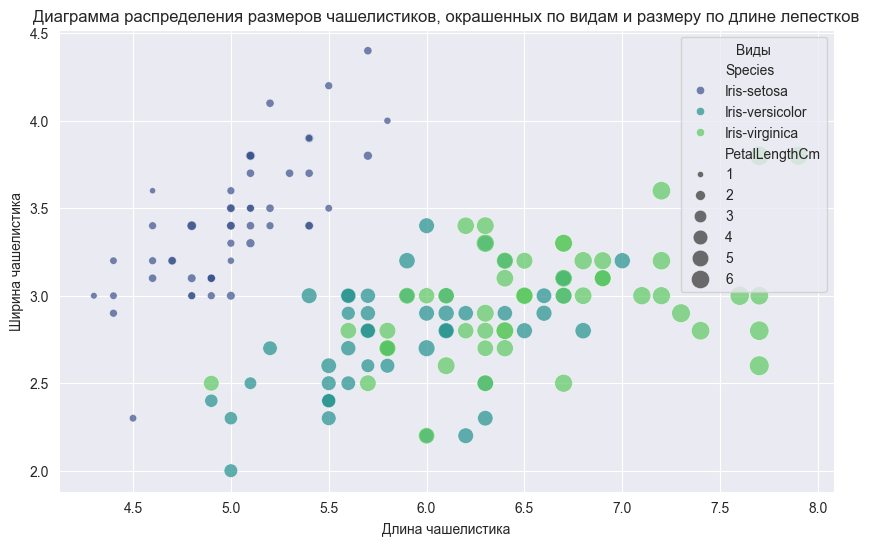

In [30]:
# Настройте диаграмму рассеяния с помощью seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='SepalLengthCm', 
    y='SepalWidthCm', 
    hue='Species', 
    size='PetalLengthCm', 
    sizes=(20, 200), 
    data=iris,
    palette="viridis",
    alpha=0.7
)

# Добавьте надписи и заголовки
plt.xlabel("Длина чашелистика")
plt.ylabel("Ширина чашелистика")
plt.title("Диаграмма распределения размеров чашелистиков, окрашенных по видам и размеру по длине лепестков")

# Display the plot
plt.legend(title='Виды')
plt.show()